<a href="https://www.kaggle.com/code/ayudewi/rabies?scriptVersionId=108722281" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/animal-bites/Health_AnimalBites.csv


In [2]:
# Path of the file to read
rabies_filepath = "../input/animal-bites/Health_AnimalBites.csv"

# Read the file into a variable rabies_data
rabies_data = pd.read_csv(rabies_filepath)

# Print the first 5 rows of the data
rabies_data.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988-10-02 00:00:00,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN


In [3]:
#Check data
rabies_data.columns

Index(['bite_date', 'SpeciesIDDesc', 'BreedIDDesc', 'GenderIDDesc', 'color',
       'vaccination_yrs', 'vaccination_date', 'victim_zip', 'AdvIssuedYNDesc',
       'WhereBittenIDDesc', 'quarantine_date', 'DispositionIDDesc',
       'head_sent_date', 'release_date', 'ResultsIDDesc'],
      dtype='object')

Bites by Species
DOG        7029
CAT        1568
BAT         237
RACCOON      27
OTHER        11
HORSE         5
FERRET        4
RABBIT        3
SKUNK         1
Name: SpeciesIDDesc, dtype: int64


<AxesSubplot:title={'center':'Number of people were biten by animal'}>

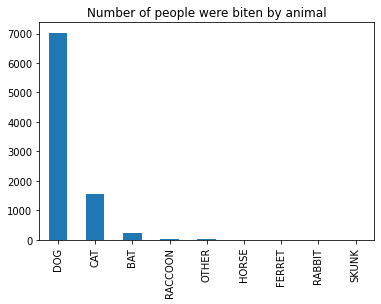

In [4]:
# Count animal bites and barplot
print("Bites by Species")
print(rabies_data["SpeciesIDDesc"].value_counts())
rabies_data["SpeciesIDDesc"].value_counts().plot(kind="bar", title="Number of people were biten by animal")

In [5]:
#Count rabies test results
print(rabies_data["ResultsIDDesc"].value_counts())

UNKNOWN     1240
NEGATIVE     299
POSITIVE       4
Name: ResultsIDDesc, dtype: int64


In [6]:
#Explore data for animal bites with rabies positive
pos = rabies_data[rabies_data["ResultsIDDesc"] == "POSITIVE"]
print(pos)

                bite_date SpeciesIDDesc      BreedIDDesc GenderIDDesc  color  \
1418  2015-05-05 00:00:00           BAT              NaN          NaN    NaN   
1502  2017-04-29 00:00:00           DOG  GREAT PYRENEESE       FEMALE  WHITE   
1677                  NaN           BAT              NaN          NaN    NaN   
1678                  NaN           BAT              NaN          NaN    NaN   

      vaccination_yrs vaccination_date victim_zip AdvIssuedYNDesc  \
1418              NaN              NaN      40203             NaN   
1502              NaN              NaN      40210             NaN   
1677              NaN              NaN      40207             NaN   
1678              NaN              NaN      40214             NaN   

     WhereBittenIDDesc quarantine_date DispositionIDDesc       head_sent_date  \
1418               NaN             NaN               NaN  2015-05-05 00:00:00   
1502               NaN             NaN               NaN  2017-05-01 00:00:00   
1677      

This data contain signifcant small amount of positive test data and it is difficult to conclude whether bites are correlated with rabies. However from this figure, it is shown that out of 4 rabies confirmed, 3 were bats.